In this notebook, we will conduct time series analysis to predict sales for the next 7 days.

In [1]:
# Import the necessary libraries
import pandas as pd  # Import Pandas library for data manipulation
import numpy as np  # Import NumPy library for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib library for data visualization
import seaborn as sns  # Import Seaborn library for statistical data visualization
import time  # Import Time library for time-related functions
import statsmodels.api as sm

In [2]:
# Reading the train dataset from a CSV file
df = pd.read_csv('../Dataset/train.csv')

# Displaying the dataset
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [3]:
# Displaying statistical information about the numeric columns in the dataset
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
# Displaying information about the data types of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
# Dropping the 'Row ID' column as it doesn't contribute much to the data analysis process
df.drop('Row ID', axis=1, inplace=True)

# Converting the 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')

# Converting the 'Ship Date' column to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Displaying information about the data types of each column after conversion
df.info() 

# Printing description of 'Order Date' column
print('Order Date Description\n') 
print(df['Order Date'].describe()) 

# Printing description of 'Ship Date' column
print('\nShip Date Description\n')
print(df['Ship Date'].describe()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Order Date     9800 non-null   datetime64[ns]
 2   Ship Date      9800 non-null   datetime64[ns]
 3   Ship Mode      9800 non-null   object        
 4   Customer ID    9800 non-null   object        
 5   Customer Name  9800 non-null   object        
 6   Segment        9800 non-null   object        
 7   Country        9800 non-null   object        
 8   City           9800 non-null   object        
 9   State          9800 non-null   object        
 10  Postal Code    9789 non-null   float64       
 11  Region         9800 non-null   object        
 12  Product ID     9800 non-null   object        
 13  Category       9800 non-null   object        
 14  Sub-Category   9800 non-null   object        
 15  Product Name   9800 n

In [6]:
# Sorting the data by the 'Order Date' column in ascending order
df.sort_values(by=['Order Date'], inplace=True, ascending=True)

# Setting the 'Order Date' column as the index of the DataFrame for time series analysis
df.set_index("Order Date", inplace=True)

# Creating a new DataFrame with only the 'Sales' column and 'Order Date' as the index
new_data = pd.DataFrame(df['Sales'])

# Displaying the new DataFrame
new_data


,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


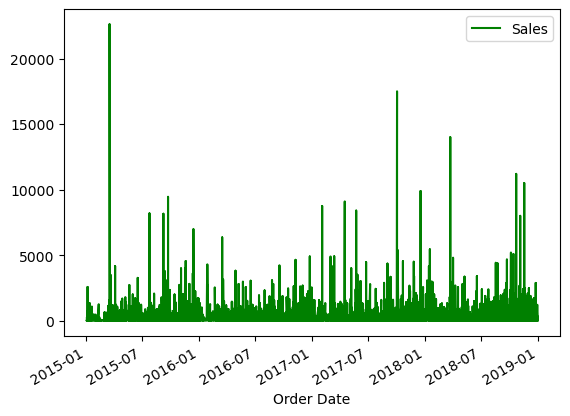

In [7]:
# Plotting the sales data to visualize the distribution from the year 2015 to 2018
new_data.plot(color='green'); 

# Displaying the plot

A time series is considered stationary when its mean and variance remain constant over time. To determine whether the sales distribution is stationary or not, we will conduct some stationarity tests.

In [8]:
# Resampling the sales data to daily frequency and calculating the daily mean
new_data = pd.DataFrame(new_data['Sales'].resample('D').mean())

# Interpolating missing values using linear interpolation method
new_data = new_data.interpolate(method='linear')

# Explanation: Resampling the data to daily frequency helps in detecting any underlying patterns or trends. Interpolating missing values ensures that the time series is evenly spaced and ready for further analysis.

## Method 1
To check for stationarity by comparing the change in mean and variance over time, we will split the data into train, test, and validation sets.


In [9]:
# Splitting the sales data into train, test, and validation sets
# The data is shuffled randomly (sampled with frac=1) and then split based on the specified proportions
# 60% of the data is allocated for training, 20% for testing, and 20% for validation
train, test, validate = np.split(new_data['Sales'].sample(frac=1), [int(.6*len(new_data['Sales'])), int(.8*len(new_data['Sales']))])

# Explanation: This approach divides the data into three sets: training data (60%), testing data (20%), and validation data (20%). This allows us to evaluate the stationarity of the time series by comparing the mean and variance across these subsets.

# Printing the train dataset
print('Train Dataset')
print(train)

# Printing the test dataset
print('Test Dataset')
print(test)

# Printing the validate dataset
print('Validate Dataset')
print(validate)

Train Dataset
Order Date
2018-11-06    158.842593
2015-08-14    113.499259
2015-12-15    252.893200
2017-08-26    243.714900
2016-05-27    105.529472
                 ...    
2015-04-29    128.140667
2016-01-13    155.569500
2015-07-21    245.185250
2015-09-13     85.027200
2015-05-20     45.729143
Name: Sales, Length: 874, dtype: float64
Test Dataset
Order Date
2015-02-27     19.456000
2017-10-16    142.182000
2016-12-27    234.020327
2015-08-18    152.827486
2016-11-24    121.876400
                 ...    
2016-08-31    371.685286
2016-10-16    824.970000
2016-12-25    262.810500
2017-01-27     74.159556
2017-05-28    213.732400
Name: Sales, Length: 292, dtype: float64
Validate Dataset
Order Date
2018-10-08    101.392667
2018-09-05     65.408800
2015-03-24     32.690000
2015-05-19     45.810000
2018-12-30    101.970000
                 ...    
2016-02-25     12.935000
2016-03-30    190.408000
2018-06-11    112.921000
2016-01-05     49.212000
2018-05-29     86.388500
Name: Sales, Len

In [10]:
# Calculating the mean of train, test, and validate datasets
mean1, mean2, mean3 = train.mean(), test.mean(), validate.mean()

# Calculating the variance of train, test, and validate datasets
var1, var2, var3 = train.var(), test.var(), validate.var()

# Printing the mean values
print('Mean:')
print(mean1, mean2, mean3)

# Printing the variance values
print('Variance:')
print(var1, var2, var3)


Mean:
209.90031298196402 254.86444778538777 227.9827317590238
Variance:
45448.67531929149 119464.37265906362 102806.90892553596


Based on the observed values of mean and variance, it seems that there isn't a significant difference among the three sets, suggesting that the series may be stationary. However, to confirm our observations, let's conduct a standard stationarity test called the Augmented Dickey-Fuller test.

**Augmented Dickey-Fuller test**

The Augmented Dickey-Fuller test is a statistical test, also known as a unit root test. It helps in assessing the presence of a trend in a time series.

The null hypothesis of the test states that the time series can be represented by a unit root, meaning it is not stationary. The alternative hypothesis (rejecting the null hypothesis) suggests that the time series is stationary.

1. Null Hypothesis (H0): The time series is not stationary.
2. Alternate Hypothesis (H1): The time series is stationary.

The interpretation of the test result relies on the p-value obtained from the test:

1. If the p-value is greater than 0.05: We fail to reject the null hypothesis (H0), indicating that the data has a unit root and is non-stationary.
2. If the p-value is less than or equal to 0.05: We reject the null hypothesis (H0), suggesting that the data does not have a unit root and is stationary.

## Method 2
Augmented Dicky Fuller Test

In [11]:
from statsmodels.tsa.stattools import adfuller #importing adfuller tool from statsmodels
#statsmodels provide adfuller() fucntion to implement stationarity test of a time series

adf = adfuller(new_data) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items(): #for loop to print the p-value (1%, 5% and 10%) and their respective values
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-20.809458514839356, 0.0, 2, 1455, {'1%': -3.4348523191002123, '5%': -2.8635284734563364, '10%': -2.567828646449617}, 20042.15494613892)

ADF =  -20.809458514839356

p-value =  0.0

Critical Values: 
1% : -3.4348523191002123
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8635284734563364
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.567828646449617
Null Hypothesis Rejected. Time Series is Stationary


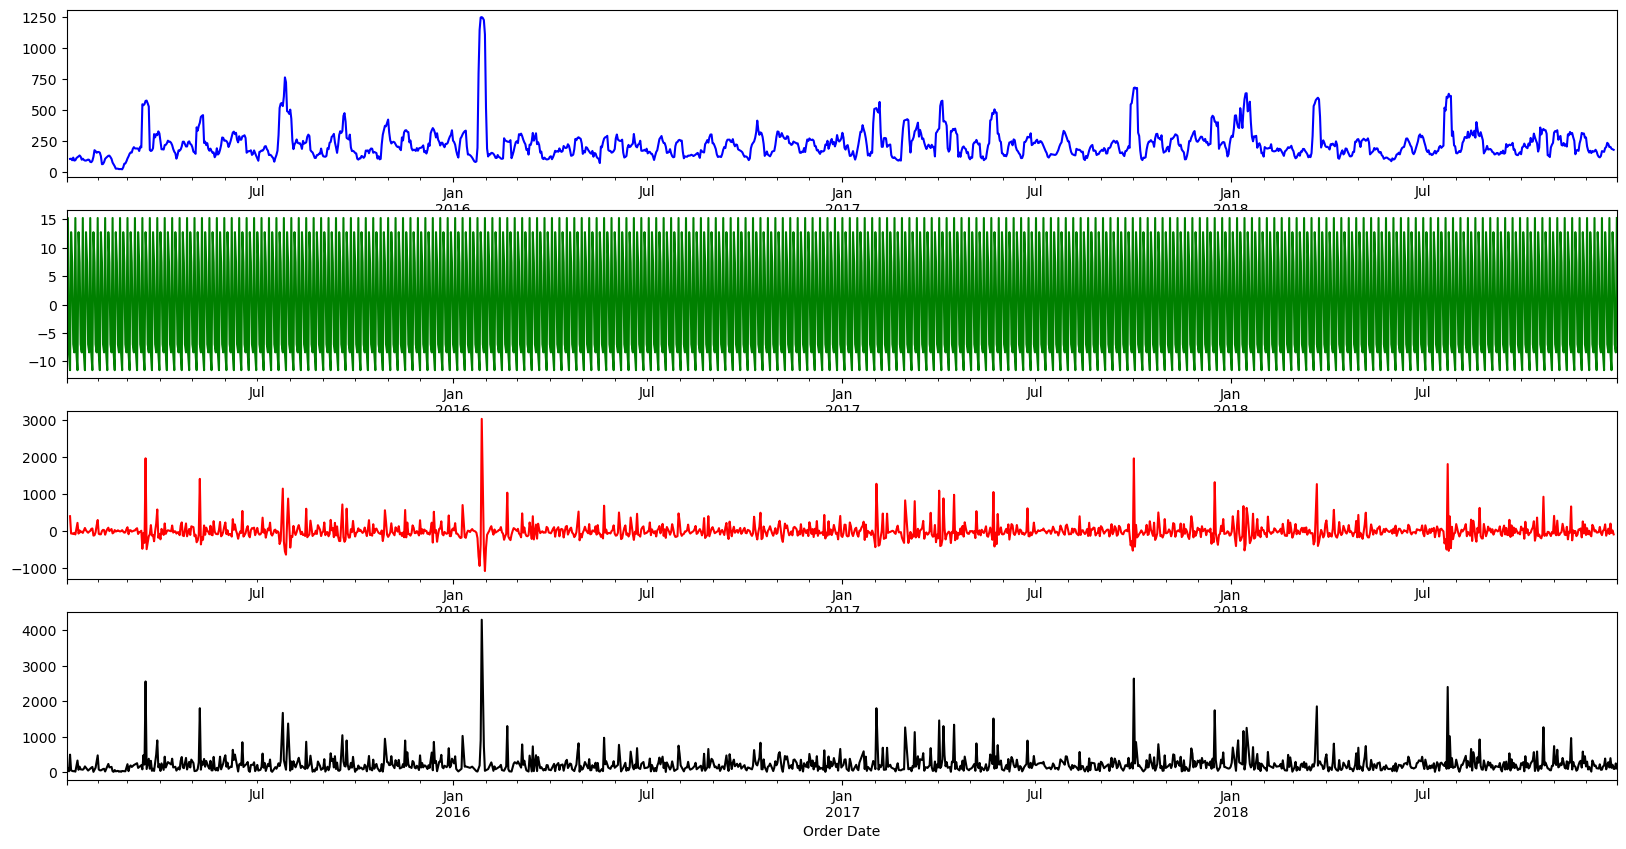

In [12]:
# Decomposing the time series data into trend and seasonality components
decomposition = sm.tsa.seasonal_decompose(new_data, model='additive')

# Plotting the decomposed components with custom colors
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10))

decomposition.trend.plot(ax=ax1, color='blue')
decomposition.seasonal.plot(ax=ax2, color='green')
decomposition.resid.plot(ax=ax3, color='red')
decomposition.observed.plot(ax=ax4, color='black')

# Displaying the plot
plt.show()


Now that we have established that our time series data is stationary, let's proceed with model training for sales forecasting. We have opted for the SARIMA model for this task.

SARIMA, or Seasonal Autoregressive Integrated Moving Average, is an extension of ARIMA designed to handle time series data with a seasonal component.

SARIMA requires the selection of hyperparameters for both the trend and seasonal aspects of the series.

1. Trend Elements:
There are three trend elements to configure:
   - p: Trend autoregression order.
   - d: Trend difference order.
   - q: Trend moving average order.

2. Seasonal Elements:
There are four seasonal elements:
   - P: Seasonal autoregressive order.
   - D: Seasonal difference order.
   - Q: Seasonal moving average order.
   - m: The number of time steps for a single seasonal period.

The notation for a SARIMA model is specified as:
SARIMA(p,d,q)(P,D,Q)m

In [13]:
# Importing itertools library for creating combinations
import itertools

# Defining range for p, d, q parameters
p = d = q = range(0, 2)

# Generating all possible combinations of p, d, q parameters using itertools.product
pdq = list(itertools.product(p, d, q))

# Generating seasonal parameter combinations for SARIMA model
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))]

# Printing examples of parameter combinations for Seasonal ARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))


Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [14]:
# Looping through all combinations of parameters and seasonal parameters to determine the best combination for SARIMA model
for parameters in pdq:
    for seasonal_param in seasonal_pdq_comb:
        try:
            # Building SARIMA model with specified parameters
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
            # Fitting the model and computing AIC (Akaike Information Criterion)
            results = mod.fit()
            
            # Printing the AIC value for the current combination of parameters
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        
        except:
            continue


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.26774D+00    |proj g|=  1.96394D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.964D-06   7.268D+00
  F =   7.2677367694389359     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:21194.720419683938
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variab

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.31303D+00    |proj g|=  2.28957D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      2      1     0     0   9.490D-06   7.313D+00
  F =   7.3130144298363513     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21326.7500774028
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.



At iterate    5    f=  6.92996D+00    |proj g|=  7.76304D-03

At iterate   10    f=  6.92994D+00    |proj g|=  1.28031D-02

At iterate   15    f=  6.92776D+00    |proj g|=  1.88415D-01

At iterate   20    f=  6.91196D+00    |proj g|=  1.72581D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     31      1     0     0   1.063D-07   6.912D+00
  F =   6.9119294729479019     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:20159.186343116082
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  6.97227D+00    |proj g|=  5.44028D-04

At iterate   15    f=  6.97226D+00    |proj g|=  3.83898D-02

At iterate   20    f=  6.97131D+00    |proj g|=  3.88619D-01

At iterate   25    f=  6.96884D+00    |proj g|=  9.51284D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     44      1     0     0   1.471D-05   6.969D+00
  F =   6.9688316198128852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20327.113003374372
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.92748D+00    |proj g|=  2.85869D-02

At iterate   10    f=  6.92720D+00    |proj g|=  8.67827D-04

At iterate   15    f=  6.92701D+00    |proj g|=  2.44664D-02

At iterate   20    f=  6.91959D+00    |proj g|=  2.33894D-01

At iterate   25    f=  6.91115D+00    |proj g|=  1.14526D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     32      1     0     0   1.209D-05   6.911D+00
  F =   6.9111510257175706     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:20158.916390992435
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.10418D+00    |proj g|=  2.05085D-01

At iterate    5    f=  7.08709D+00    |proj g|=  4.93793D-04

At iterate   10    f=  7.08692D+00    |proj g|=  1.99715D-02

At iterate   15    f=  7.08313D+00    |proj g|=  5.25481D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     24      1     0     0   1.113D-07   7.082D+00
  F =   7.0821620513573205     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:21250.777808594292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00577D+00    |proj g|=  1.40288D-01

At iterate    5    f=  6.98689D+00    |proj g|=  2.55751D-02

At iterate   10    f=  6.98670D+00    |proj g|=  7.65727D-03

At iterate   15    f=  6.97588D+00    |proj g|=  1.71780D-01

At iterate   20    f=  6.89267D+00    |proj g|=  1.05794D-01

At iterate   25    f=  6.88712D+00    |proj g|=  3.66566D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact    

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     21      1     0     0   6.015D-06   7.079D+00
  F =   7.0786119876577231     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20647.23255600992
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08367D+00    |proj g|=  1.73668D+00

At iterate    5    f=  6.99182D+00    |proj g|=  1.34028D-01

At iterate   10    f=  6.98829D+00    |proj g|=  5.61801D-02

At iterate   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  7.09493D+00    |proj g|=  4.21959D-03

At iterate   10    f=  7.09274D+00    |proj g|=  6.17298D-02

At iterate   15    f=  7.07015D+00    |proj g|=  1.72479D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   1.085D-06   7.070D+00
  F =   7.0699226583604275     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20621.894471779007
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f=  6.98727D+00    |proj g|=  3.04096D-02

At iterate   10    f=  6.98629D+00    |proj g|=  1.30905D-03

At iterate   15    f=  6.98589D+00    |proj g|=  1.75035D-02

At iterate   20    f=  6.94308D+00    |proj g|=  2.18018D-01

At iterate   25    f=  6.88857D+00    |proj g|=  5.47835D-02

At iterate   30    f=  6.88644D+00    |proj g|=  2.33619D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     53      1     0     0   2.336D-05   6.886D+00
  F =   6.8864407748865721     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:20088.8612995


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.17009D+00    |proj g|=  1.46490D-03

At iterate    5    f=  7.17003D+00    |proj g|=  7.28306D-09

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     15      1     0     0   7.283D-09   7.170D+00
  F =   7.1700266534878123     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:20911.79772157046
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.16978D+00    |proj g|=  1.12826D-02

At iterate   10    f=  7.16976D+00    |proj g|=  5.09238D-03

At iterate   15    f=  7.16911D+00    |proj g|=  1.05551D-01

At iterate   20    f=  7.13750D+00    |proj g|=  2.16763D-01

At iterate   25    f=  7.12807D+00    |proj g|=  4.56572D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     28     35      1     0     0   9.060D-07   7.128D+00
  F =   7.1280616322491106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:20789.427719638406
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  7.16983D+00    |proj g|=  5.39178D-04

At iterate   15    f=  7.16978D+00    |proj g|=  1.48238D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   6.552D-05   7.170D+00
  F =   7.1697727453672311     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:20913.057325490845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.30167D+00    |proj g|=  6.98392D-06

           *

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  7.15174D+00    |proj g|=  5.86949D-02

At iterate   10    f=  7.15153D+00    |proj g|=  9.64174D-03

At iterate   15    f=  7.14961D+00    |proj g|=  1.73737D-01

At iterate   20    f=  7.13250D+00    |proj g|=  1.56794D-01

At iterate   25    f=  7.12746D+00    |proj g|=  2.99147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     37      1     0     0   3.988D-06   7.127D+00
  F =   7.1274553401047669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:20789.6597717455
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  7.00504D+00    |proj g|=  2.04174D-01

At iterate   20    f=  6.99937D+00    |proj g|=  2.08772D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     41      1     0     0   1.114D-05   6.999D+00
  F =   6.9990118487479931     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:20413.118550949148
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.00639D+00    |proj g|=  1.76860D-01

At iterate  

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     22      1     1     0   1.194D-03   7.312D+00
  F =   7.3122870162768692     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:21326.62893946335
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.09750D+00    |proj g|=  1.40993D-01


 This problem is unconstrained.



At iterate    5    f=  7.05073D+00    |proj g|=  4.06161D-02

At iterate   10    f=  7.05043D+00    |proj g|=  2.97497D-03

At iterate   15    f=  7.04937D+00    |proj g|=  1.58119D-01

At iterate   20    f=  6.91306D+00    |proj g|=  1.93257D-01

At iterate   25    f=  6.90631D+00    |proj g|=  5.58045D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     41      1     0     0   2.673D-06   6.906D+00
  F =   6.9062854647007716     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:20144.72841506745
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.



At iterate   10    f=  6.95831D+00    |proj g|=  1.87453D-02

At iterate   15    f=  6.95520D+00    |proj g|=  1.12506D-01

At iterate   20    f=  6.95203D+00    |proj g|=  1.32743D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     41      1     0     0   7.640D-07   6.952D+00
  F =   6.9520114114031673     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:20278.065275651636
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate  

 This problem is unconstrained.



At iterate    5    f=  6.94922D+00    |proj g|=  1.40644D-02

At iterate   10    f=  6.94917D+00    |proj g|=  2.62991D-03

At iterate   15    f=  6.94916D+00    |proj g|=  4.40789D-02

At iterate   20    f=  6.94902D+00    |proj g|=  3.94525D-02

At iterate   25    f=  6.94900D+00    |proj g|=  5.07128D-03

At iterate   30    f=  6.94896D+00    |proj g|=  5.92171D-02

At iterate   35    f=  6.94726D+00    |proj g|=  9.34240D-02

At iterate   40    f=  6.94333D+00    |proj g|=  8.70677D-02

At iterate   45    f=  6.94291D+00    |proj g|=  7.47922D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     45     67   

 This problem is unconstrained.


  ys=-1.761E-02  -gs= 6.625E-03 BFGS update SKIPPED

At iterate    5    f=  7.14363D+00    |proj g|=  5.32171D-02

At iterate   10    f=  7.14328D+00    |proj g|=  1.76561D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     26      1     1     0   9.202D-04   7.143D+00
  F =   7.1432764579617603     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:20835.794151416492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= 

 This problem is unconstrained.



At iterate    5    f=  7.05361D+00    |proj g|=  4.28596D-02

At iterate   10    f=  7.04981D+00    |proj g|=  5.47555D-03

At iterate   15    f=  7.04977D+00    |proj g|=  7.64873D-03

At iterate   20    f=  7.04660D+00    |proj g|=  7.62664D-02

At iterate   25    f=  7.02231D+00    |proj g|=  1.54657D-01

At iterate   30    f=  6.90614D+00    |proj g|=  6.59042D-02

At iterate   35    f=  6.90524D+00    |proj g|=  1.06750D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     55      1     0     0   3.199D-05   6.905D+00
  F =   6.9052410433923921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.98866D+00    |proj g|=  2.77933D-02

At iterate   10    f=  6.98851D+00    |proj g|=  3.92904D-03

At iterate   15    f=  6.98603D+00    |proj g|=  4.73962D-02

At iterate   20    f=  6.89582D+00    |proj g|=  9.97375D-02

At iterate   25    f=  6.88843D+00    |proj g|=  7.07255D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     33      1     0     0   8.800D-06   6.888D+00
  F =   6.8884278352866284     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:20092.65556769581
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.96053D+00    |proj g|=  1.04070D-01

At iterate   10    f=  6.95709D+00    |proj g|=  3.35103D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     20      1     0     0   6.725D-04   6.957D+00
  F =   6.9570906717157941     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:20294.876398723256
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08701D+00    |proj g|=  5.55234D-03


 This problem is unconstrained.



At iterate    5    f=  7.08697D+00    |proj g|=  5.12745D-03

At iterate   10    f=  7.08418D+00    |proj g|=  7.04466D-02

At iterate   15    f=  7.06187D+00    |proj g|=  3.59628D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   2.255D-06   7.062D+00
  F =   7.0618606367588326     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20598.385616788757


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.02040D+00    |proj g|=  1.25442D-01

At iterate    5    f=  6.98911D+00    |proj g|=  3.18348D-02

At iterate   10    f=  6.98805D+00    |proj g|=  2.20944D-03

At iterate   15    f=  6.98498D+00    |proj g|=  4.69641D-02

At iterate   20    f=  6.90913D+00    |proj g|=  1.32956D-01

At iterate   25    f=  6.88774D+00    |proj g|=  2.83921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     40      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99113D+00    |proj g|=  7.34719D-02

At iterate    5    f=  6.95925D+00    |proj g|=  2.98442D+00
  ys=-3.184E-03  -gs= 5.426E-03 BFGS update SKIPPED

At iterate   10    f=  6.95159D+00    |proj g|=  3.57149D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  6.95044D+00    |proj g|=  2.25930D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     53      1     1     0   2.259D-02   6.950D+00
  F =   6.9504395013352784     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:20275.48158589367
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.28346D+00    |proj g|=  8.52325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number o

 This problem is unconstrained.



At iterate   15    f=  6.95494D+00    |proj g|=  7.55988D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     83      2     0     0   7.003D-03   6.955D+00
  F =   6.9549413106357045     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:20288.608861813715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99173D+00    |proj g|=  2.63579D-01

At iterate    5    f=  6.96346D+00    |proj g|=  1.12018D-01

At iterate   10    f=  6.95206D+00    |proj g|=  4.25572D-02

At iterate  


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:20247.12485940091
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08676D+00    |proj g|=  6.56950D-03

At iterate    5    f=  7.08668D+00    |proj g|=  2.78447D-03

At iterate   10    f=  7.08666D+00    |proj g|=  3.40409D-03

At iterate   15    f=  7.08517D+00    |proj g|=  4.15785D-02

At iterate   20    f=  7.06207D+00    |proj g|=  2.74432D-02

At iterate   25    f=  7.06131D+00    |proj g|=  2.99949D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.01555D+00    |proj g|=  1.25494D-01

At iterate    5    f=  6.98425D+00    |proj g|=  3.18076D-02

At iterate   10    f=  6.98317D+00    |proj g|=  2.29841D-03

At iterate   15    f=  6.98295D+00    |proj g|=  3.12292D-03

At iterate   20    f=  6.97803D+00    |proj g|=  4.33156D-02

At iterate   25    f=  6.95848D+00    |proj g|=  1.41198D-01

At iterate   30    f=  6.91455D+00    |proj g|=  1.87544D-02

At iterate   35    f=  6.90202D+00    |proj g|=  8.05019D-02

At iterate   40    f=  6.88382D+00    |proj g|=  5.16108D-02

At iterate   45    f=  6.88251D+00    |proj g|=  1.35326D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:20795.675610560873
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07329D+00    |proj g|=  1.68974D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   1.125D-05   7.073D+00
  F =   7.0731598260999968     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:20631.33405290759
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =  

 This problem is unconstrained.
 This problem is unconstrained.


SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:20632.153341330857
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.23253D+00    |proj g|=  4.68684D-03

At iterate    5    f=  7.23250D+00    |proj g|=  3.77571D-03


 This problem is unconstrained.



At iterate   10    f=  7.23087D+00    |proj g|=  5.45145D-02

At iterate   15    f=  7.20594D+00    |proj g|=  1.88383D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     20      1     0     0   7.589D-07   7.206D+00
  F =   7.2057190933159116     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:21017.8768761092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18966D+00    |proj g|=  9.62277D-02


 This problem is unconstrained.



At iterate    5    f=  7.13907D+00    |proj g|=  5.48735D-02

At iterate   10    f=  7.13485D+00    |proj g|=  1.13530D-03

At iterate   15    f=  7.12559D+00    |proj g|=  1.36102D-01

At iterate   20    f=  7.03478D+00    |proj g|=  7.00723D-02

At iterate   25    f=  7.03178D+00    |proj g|=  1.00585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     40      1     0     0   1.041D-05   7.032D+00
  F =   7.0317781204580534     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:20512.664999255685
RUNNING THE L-BFGS-B CODE

           * * *

Machine pre

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.98679D+00    |proj g|=  1.37036D-01

At iterate   10    f=  6.98607D+00    |proj g|=  6.49237D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     0     0   6.492D-04   6.986D+00
  F =   6.9860653261601753     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:20377.36649108307
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99456D+00    |proj g|=  2.08736D-01

At iterate   

 This problem is unconstrained.



At iterate   10    f=  7.29134D+00    |proj g|=  4.47895D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     1     0   4.479D-04   7.291D+00
  F =   7.2913425155043043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:21267.554775210552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08597D+00    |proj g|=  1.35988D-01


 This problem is unconstrained.



At iterate    5    f=  7.04092D+00    |proj g|=  7.46139D-02

At iterate   10    f=  7.03964D+00    |proj g|=  8.16891D-03

At iterate   15    f=  7.03954D+00    |proj g|=  1.23523D-02

At iterate   20    f=  7.03447D+00    |proj g|=  2.04425D-01

At iterate   25    f=  6.90405D+00    |proj g|=  1.67873D-01

At iterate   30    f=  6.88317D+00    |proj g|=  1.90136D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     34     50      1     0     0   1.846D-04   6.883D+00
  F =   6.8831344852085463     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:20079.2201588

 This problem is unconstrained.



At iterate   10    f=  6.93446D+00    |proj g|=  1.46678D-03

At iterate   15    f=  6.93442D+00    |proj g|=  5.29775D-03

At iterate   20    f=  6.93190D+00    |proj g|=  1.16545D-01

At iterate   25    f=  6.92450D+00    |proj g|=  2.99220D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   1.912D-05   6.924D+00
  F =   6.9244968541645218     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:20199.832826743746
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At 

 This problem is unconstrained.



At iterate    5    f=  6.93144D+00    |proj g|=  1.24086D-01

At iterate   10    f=  6.92993D+00    |proj g|=  3.12414D-02

At iterate   15    f=  6.92992D+00    |proj g|=  7.50818D-03

At iterate   20    f=  6.92986D+00    |proj g|=  7.50074D-02

At iterate   25    f=  6.92968D+00    |proj g|=  2.04663D-03

At iterate   30    f=  6.92968D+00    |proj g|=  1.57852D-02

At iterate   35    f=  6.92945D+00    |proj g|=  8.11918D-02

At iterate   40    f=  6.92541D+00    |proj g|=  1.52682D-01

At iterate   45    f=  6.91995D+00    |proj g|=  2.06706D-02

At iterate   50    f=  6.91993D+00    |proj g|=  2.66376D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/homebrew/anaconda3/envs/ameya/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.


  ys=-1.472E-02  -gs= 1.905E-02 BFGS update SKIPPED

At iterate    5    f=  7.12240D+00    |proj g|=  1.57463D-01

At iterate   10    f=  7.12158D+00    |proj g|=  2.23863D-03

At iterate   15    f=  7.12158D+00    |proj g|=  2.08693D-03

At iterate   20    f=  7.12157D+00    |proj g|=  3.74941D-02

At iterate   25    f=  7.12054D+00    |proj g|=  3.17424D-01

At iterate   30    f=  7.11466D+00    |proj g|=  9.82828D-02

At iterate   35    f=  7.06299D+00    |proj g|=  3.87110D-01

At iterate   40    f=  7.05935D+00    |proj g|=  2.10174D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     60      1     1

 This problem is unconstrained.



At iterate    5    f=  7.05849D+00    |proj g|=  3.17557D-01

At iterate   10    f=  7.03992D+00    |proj g|=  1.05032D-01

At iterate   15    f=  7.03911D+00    |proj g|=  2.51000D-03

At iterate   20    f=  7.03904D+00    |proj g|=  9.94094D-03

At iterate   25    f=  7.03585D+00    |proj g|=  4.36525D-01

At iterate   30    f=  6.94310D+00    |proj g|=  2.61380D-01

At iterate   35    f=  6.88355D+00    |proj g|=  1.17353D-01

At iterate   40    f=  6.88243D+00    |proj g|=  2.90402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     66      1     0     0   6.560D-05   6.882D+00
  F =   6.88243071294

In [15]:
# Defining the SARIMA model with the chosen combination of parameters
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),             # Trend parameters: (p, d, q)
                                seasonal_order=(1, 1, 1, 12), # Seasonal parameters: (P, D, Q, m)
                                enforce_stationarity=False,  # Allowing non-stationary series
                                enforce_invertibility=False) # Allowing non-invertible series

# Fitting the SARIMA model to the data
results = mod.fit()

# Displaying the summary of the model results
print(results.summary().tables[1])


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.11716D+00    |proj g|=  1.38132D-01


 This problem is unconstrained.



At iterate    5    f=  7.05849D+00    |proj g|=  3.17557D-01

At iterate   10    f=  7.03992D+00    |proj g|=  1.05032D-01

At iterate   15    f=  7.03911D+00    |proj g|=  2.51000D-03

At iterate   20    f=  7.03904D+00    |proj g|=  9.94094D-03

At iterate   25    f=  7.03585D+00    |proj g|=  4.36525D-01

At iterate   30    f=  6.94310D+00    |proj g|=  2.61380D-01

At iterate   35    f=  6.88355D+00    |proj g|=  1.17353D-01

At iterate   40    f=  6.88243D+00    |proj g|=  2.90402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     66      1     0     0   6.560D-05   6.882D+00
  F =   6.88243071294

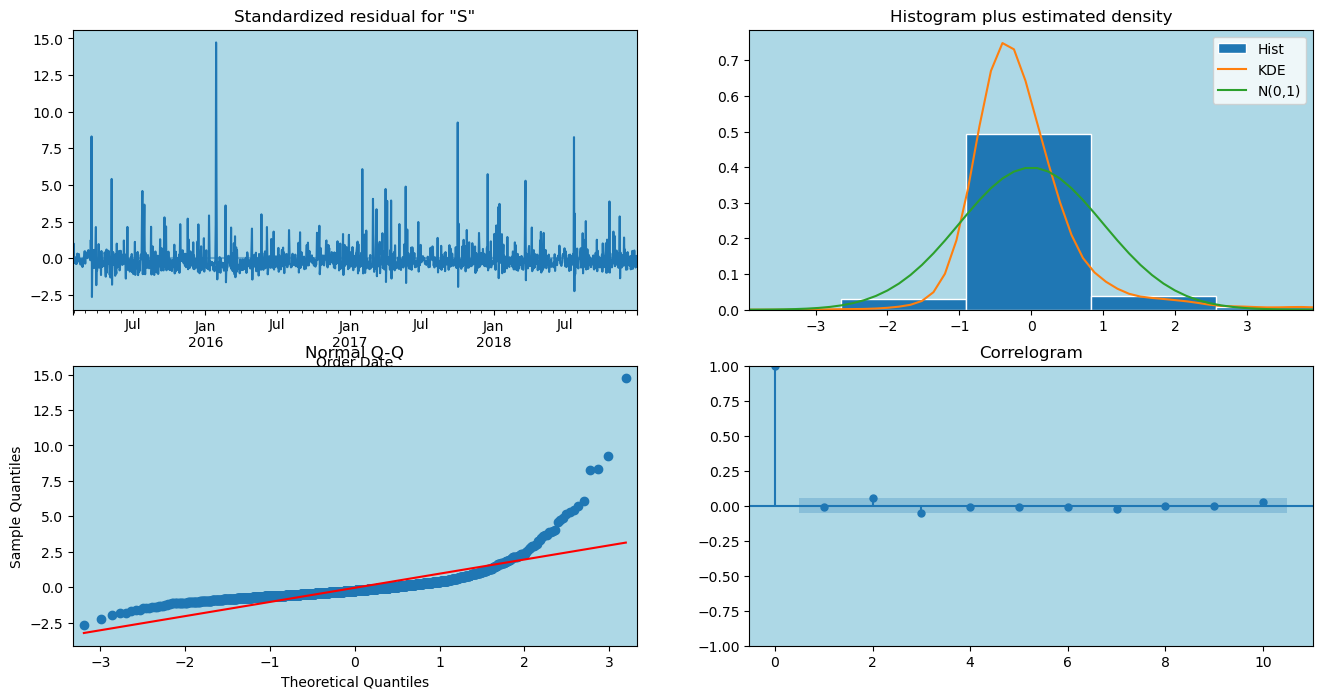

In [16]:
# Generating diagnostic plots for the SARIMA model results
diag_plot = results.plot_diagnostics(figsize=(16, 8))

# Changing the color of the diagnostic plots to blue
for ax in diag_plot.axes:
    ax.set_facecolor('lightblue')

# Displaying the diagnostic plots
plt.show()


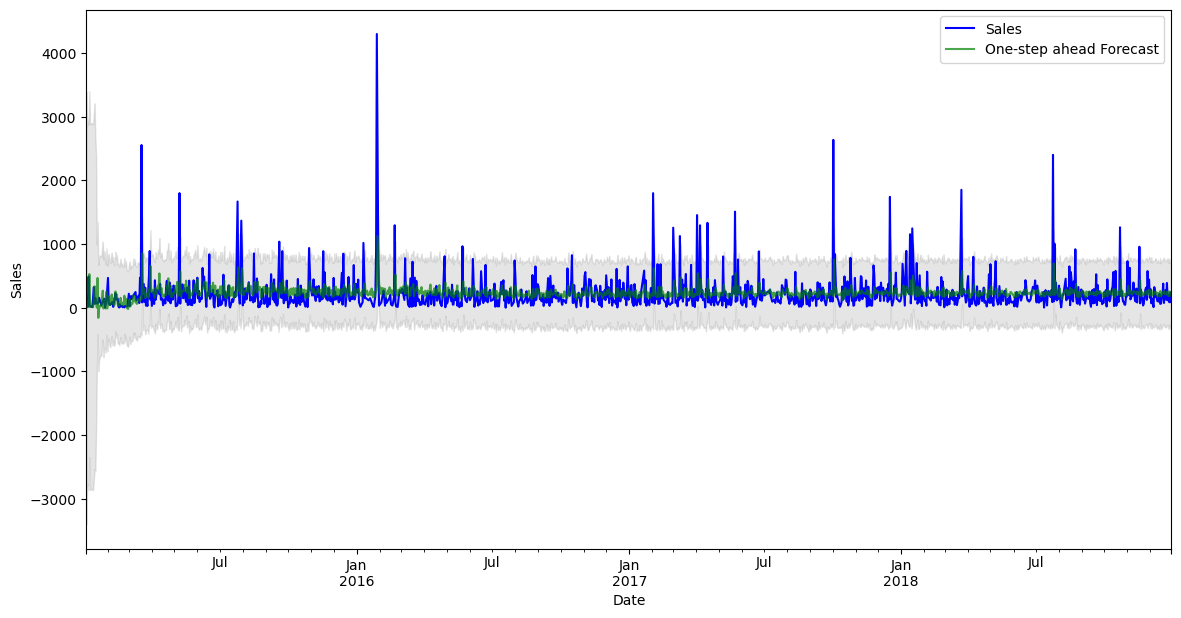

In [17]:
# Generating predictions using the SARIMA model
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False)

# Extracting confidence intervals for the predictions
pred_val = pred.conf_int()

# Plotting the observed values
ax = new_data['2014':].plot(label='observed', color='blue')  # Changing the color of observed values plot to blue

# Plotting the one-step ahead forecast with color changed to green
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7), color='green')

# Filling the area between the upper and lower confidence intervals with color changed to gray
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='gray', alpha=.2)

# Setting labels for x-axis and y-axis
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.show()


In [18]:
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error is 267.66


To generate an out-of-sample forecast for sales values after a specific time period beyond the given data, such as forecasting sales for the next 7 days, we can use the `get_forecast()` method from the SARIMA model results. This method allows us to forecast future values based on the trained model. Let's proceed with generating the out-of-sample forecast.

In [19]:
# Generating a forecast for the next 7 days beyond the last date in the 'Order Date' column
forecast = results.forecast(steps=7)

# Converting the forecasted values to integers
forecast_int = forecast.astype('int')

# Printing the sales forecast
print(forecast_int)


2018-12-31    229
2019-01-01    241
2019-01-02    244
2019-01-03    229
2019-01-04    196
2019-01-05    254
2019-01-06    223
Freq: D, Name: predicted_mean, dtype: int64


In [20]:
# Converting the forecasted sales values to integers
forecast = forecast.astype('int')

# Converting the forecast Series to a DataFrame
forecast_df = forecast.to_frame()

# Resetting the index to convert the index to a column
forecast_df.reset_index(level=0, inplace=True)

# Renaming the columns appropriately
forecast_df.columns = ['Prediction Date', 'Predicted Sales']

# Saving the forecast DataFrame as a CSV file named 'prediction.csv' without including the index
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv', index=False)
